# Mini Project : Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('AMFI.csv')

In [3]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data.head()

,Net Asset Value,Repurchase Price,Sale Price
Date,,,
2015-05-15,84.2256,NaN,NaN
2015-05-18,85.3200,NaN,NaN
2015-05-19,85.2541,NaN,NaN
2015-05-20,85.7301,NaN,NaN
2015-05-21,85.7048,NaN,NaN


In [4]:
data.shape

(1231, 3)

In [5]:
data = data[['Net Asset Value']]
data.head()

,Net Asset Value
Date,
2015-05-15,84.2256
2015-05-18,85.3200
2015-05-19,85.2541
2015-05-20,85.7301
2015-05-21,85.7048


In [6]:
forecast_out = 30

data['Prediction'] = data[['Net Asset Value']].shift(-forecast_out)
data.head(6)

,Net Asset Value,Prediction
Date,,
2015-05-15,84.2256,85.3241
2015-05-18,85.3200,84.6297
2015-05-19,85.2541,85.1875
2015-05-20,85.7301,86.0696
2015-05-21,85.7048,86.0877
2015-05-22,86.0173,86.4373


In [7]:
X = np.array(data.drop(['Prediction'], 1))

In [8]:
X = X[:-forecast_out]

In [9]:
Y = np.array(data['Prediction'])

In [10]:
Y = Y[:-forecast_out]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lr_confidence = lr.score(X_test, Y_test)
print("LR Confidence Score: ", lr_confidence)

LR Confidence Score:  0.7805942471279831


In [14]:
X_forecast = np.array(data.drop(['Prediction'], 1))[-forecast_out:]
lr_prediction = lr.predict(X_forecast)

In [15]:
data1 = pd.DataFrame(data['Net Asset Value'][-forecast_out:])
data1['LR Prediction'] = lr_prediction

In [16]:
data1.head()

,Net Asset Value,LR Prediction
Date,,
2020-03-30,86.3906,88.461643
2020-03-31,89.6315,91.344861
2020-04-01,86.3053,88.385757
2020-04-03,84.5772,86.848379
2020-04-07,91.7474,93.227240


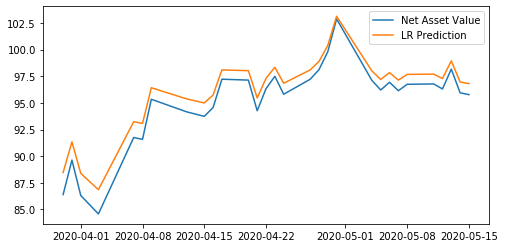

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(data1['Net Asset Value'], label='Net Asset Value')
plt.plot(data1['LR Prediction'], label='LR Prediction');
plt.legend();

In [18]:
Y_true = data[['Net Asset Value']][-forecast_out:]

In [19]:
Y_true.head()

,Net Asset Value
Date,
2020-03-30,86.3906
2020-03-31,89.6315
2020-04-01,86.3053
2020-04-03,84.5772
2020-04-07,91.7474


In [20]:
Y_pred = np.round(lr_prediction, decimals=2)

In [21]:
mean_squared_error(Y_true, Y_pred, squared=False)

1.1998163019118104

In [22]:
mean_absolute_error(Y_true, Y_pred)

1.1188033333333336

### Using Linear SVR Method

In [23]:
from sklearn.svm import LinearSVR

In [24]:
linear_svr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
linear_svr.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvr',
                 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=0, tol=1e-05,
                           verbose=0))],
         verbose=False)

In [25]:
svm_confidence = linear_svr.score(X_test, Y_test)
print("SVM Confidence Score: ", svm_confidence)

SVM Confidence Score:  0.7712222381163141


In [26]:
linear_svr_prediction = linear_svr.predict(X_forecast)

In [27]:
data2  = pd.DataFrame(data['Net Asset Value'][-forecast_out:])
data2['Linear SVR Prediction'] = linear_svr_prediction

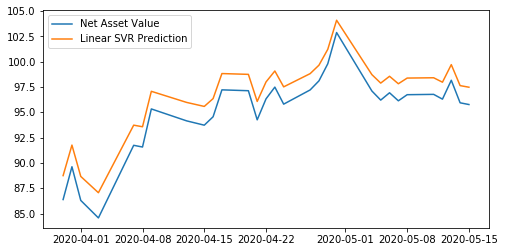

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(data2['Net Asset Value'], label='Net Asset Value')
plt.plot(data2['Linear SVR Prediction'], label='Linear SVR Prediction');
plt.legend();

In [29]:
Y_pred2 = linear_svr_prediction

In [30]:
mean_squared_error(Y_true, Y_pred2, squared=False)

1.7836402011816794

In [31]:
mean_absolute_error(Y_true, Y_pred2)

1.7626463381960709

### Using SGD Regressor

In [32]:
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_reg.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [57]:
sgd_confidence = sgd_reg.score(X_test, Y_test)
print("SGD Confidence Score: ", sgd_confidence)

SGD Confidence Score:  0.7806141137965126


In [34]:
sgd_prediction = sgd_reg.predict(X_forecast)

In [35]:
data3  = pd.DataFrame(data['Net Asset Value'][-forecast_out:])
data3['SGD Regression Prediction'] = sgd_prediction

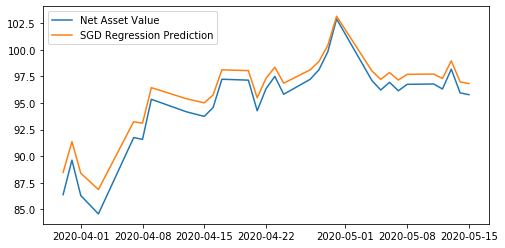

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(data3['Net Asset Value'], label='Net Asset Value')
plt.plot(data3['SGD Regression Prediction'], label='SGD Regression Prediction');
plt.legend();

In [54]:
Y_pred = sgd_prediction

In [55]:
mean_squared_error(Y_true, Y_pred, squared=False)

1.212050173206336

In [56]:
mean_absolute_error(Y_true, Y_pred)

1.1310984711336816

### Using K Nearest Neighbours

In [39]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [40]:
knn_confidence = knn.score(X_test, Y_test)
print("KNN Confidence Score is:", knn_confidence)

KNN Confidence Score is: 0.8358538709581615


In [41]:
knn_prediction = knn.predict(X_forecast)

In [42]:
data3  = pd.DataFrame(data['Net Asset Value'][-forecast_out:])
data3['KNN Prediction'] = knn_prediction

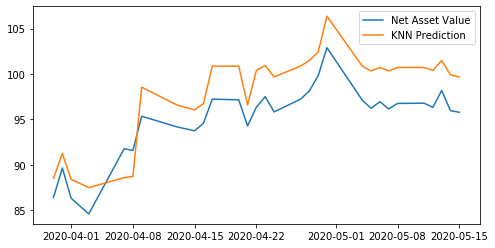

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(data3['Net Asset Value'], label='Net Asset Value')
plt.plot(data3['KNN Prediction'], Label='KNN Prediction');
plt.legend();

In [44]:
Y_pred3 = np.round(knn_prediction, decimals=2)

In [45]:
mean_squared_error(Y_true, Y_pred3, squared=False)

3.342967368222429

In [46]:
mean_absolute_error(Y_true, Y_pred3)

3.261843333333332

### Decision Tree Regressor

In [47]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
dtr_confidence = dtr.score(X_test, Y_test)
print("DTR Confidence Score is:", dtr_confidence)

DTR Confidence Score is: 0.6994276798968855


In [49]:
dtr_prediction = dtr.predict(X_forecast)

In [50]:
data4  = pd.DataFrame(data['Net Asset Value'][-forecast_out:])
data4['KNN Prediction'] = dtr_prediction

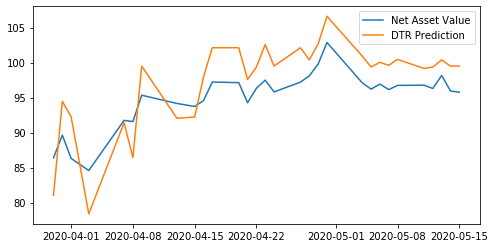

In [51]:
plt.figure(figsize=(8, 4))
plt.plot(data4['Net Asset Value'], label='Net Asset Value')
plt.plot(data4['KNN Prediction'], Label='DTR Prediction');
plt.legend();

In [52]:
Y_pred4 = knn_prediction
mean_squared_error(Y_true, Y_pred3, squared=False)

3.342967368222429

In [53]:
mean_absolute_error(Y_true, Y_pred3)

3.261843333333332